#Import

In [ ]:
import numpy as np
from itertools import chain, combinations
from sklearn.metrics import jaccard_score
from scipy.spatial import distance
import math
import time
import statistics

from termcolor import colored

import matplotlib
import matplotlib.pyplot as plt



#Creación de dos vectores Binarios

In [ ]:
def GenerarPoblacionInicial(TamPob,TamDim):
  Poblacion = []

  for i in range(TamPob):
    Individuo =[]
    for j in range(TamDim):
      rand = np.random.uniform(0,1)
      if rand < 0.5:
        Individuo.append(0)
      else:
        Individuo.append(1)
    Poblacion.append(Individuo)
  
  return np.array(Poblacion)

TamPob = 50
TamDim = 10000
Poblacion = GenerarPoblacionInicial(TamPob,TamDim)

#Diversidades Paper 4

Mattiussi, C., Waibel, M., & Floreano, D. (2004). **Measures of diversity for populations and distances between individuals with highly reorganizable genomes.** Evolutionary Computation, 12(4), 495-515.

> PDF: http://zeus.inf.ucv.cl/~bcrawford/AULA_MII_748/2020_2/4_BinaryDiversity_147909194.pdf









###1) Diversidad de SubCadenas

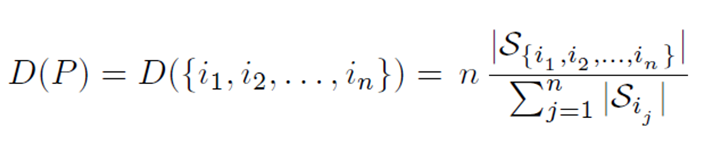

In [ ]:
def ObtenerSubCadenas(Conjuntos):
  SubConjuntos = []
  #print(f'X: {Poblacion}')
  for p in range(len(Conjuntos)):
    SubConjuntoEnOrden = []
    SubConjuntoEnOrden_set = []

    for i in range(len(Conjuntos[p])):
      for j in range(len(Conjuntos[p])):
        if i <= j:
          if j == i:
            SubConjunto = []
            SubConjunto.append(Conjuntos[p][i])
            if SubConjunto in SubConjuntoEnOrden:
              continue
            else:
              SubConjuntoEnOrden.append(SubConjunto)
          if j > i:
            if j == i+1:
              SubConjunto = []
              SubConjunto.append(Conjuntos[p][i])
              SubConjunto.append(Conjuntos[p][j])
              #print(f'SubConjunto: {SubConjunto}')
              if SubConjunto in SubConjuntoEnOrden:
                continue
              else:
                SubConjuntoEnOrden.append(SubConjunto)

            else:
              SubConjunto = []
              for k in range(i,j+1):
                SubConjunto.append(Conjuntos[p][k])
              #print(f'SubConjunto: {SubConjunto}')
              if SubConjunto in SubConjuntoEnOrden:
                continue
              else:
                SubConjuntoEnOrden.append(SubConjunto)
    for i in range(len(SubConjuntoEnOrden)):
      concatenado = ''
      for j in range(len(SubConjuntoEnOrden[i])):
        #print(f'SubConjuntoEnOrden[i][j]: {SubConjuntoEnOrden[i][j]}')
        #print(f'concatenado: {concatenado}')
        concatenado = concatenado + str(SubConjuntoEnOrden[i][j])
      SubConjuntoEnOrden_set.append(concatenado)

    SubConjuntos.append(SubConjuntoEnOrden_set)

  return SubConjuntos

def ObtenerUnionSubCadenas(SubConjuntos):
  for p in range(len(SubConjuntos)):
    if p == 0:
      UnionSubConjuntos = set(SubConjuntos[p])
    else:
      UnionSubConjuntos = UnionSubConjuntos.union(set(SubConjuntos[p]))
  
  return UnionSubConjuntos

def ObtenerDiversidadSubCadenas(Poblacion):
  SubCadenas = []
  SubCadenas = ObtenerSubCadenas(Poblacion)
  #print(f'SubCadenas: {SubCadenas}')
  Sumatoria_SubCadenas = 0
  for i in range(len(SubCadenas)):
    Sumatoria_SubCadenas = Sumatoria_SubCadenas + len(SubCadenas[i])

  UnionSubCadenas = ObtenerUnionSubCadenas(SubCadenas)
  #print(f'UnionSubCadenas: {UnionSubCadenas}')

  Diverdidad = len(Poblacion)*len(UnionSubCadenas) / Sumatoria_SubCadenas

  return Diverdidad

#Diversidad_SubCadenas = ObtenerDiversidadSubCadenas(Poblacion)
#print(f'Diversidad_SubCadenas: {Diversidad_SubCadenas}')

###2) Diversidad de Tanimoto_SubCadenas

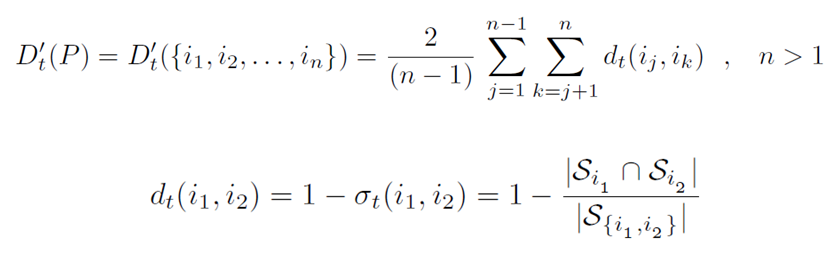

In [ ]:
def ObtenerSubCadenas(Conjuntos):
  SubConjuntos = []
  #print(f'X: {Poblacion}')
  for p in range(len(Conjuntos)):
    SubConjuntoEnOrden = []
    SubConjuntoEnOrden_set = []

    for i in range(len(Conjuntos[p])):
      for j in range(len(Conjuntos[p])):
        if i <= j:
          if j == i:
            SubConjunto = []
            SubConjunto.append(Conjuntos[p][i])
            if SubConjunto in SubConjuntoEnOrden:
              continue
            else:
              SubConjuntoEnOrden.append(SubConjunto)
          if j > i:
            if j == i+1:
              SubConjunto = []
              SubConjunto.append(Conjuntos[p][i])
              SubConjunto.append(Conjuntos[p][j])
              #print(f'SubConjunto: {SubConjunto}')
              if SubConjunto in SubConjuntoEnOrden:
                continue
              else:
                SubConjuntoEnOrden.append(SubConjunto)

            else:
              SubConjunto = []
              for k in range(i,j+1):
                SubConjunto.append(Conjuntos[p][k])
              #print(f'SubConjunto: {SubConjunto}')
              if SubConjunto in SubConjuntoEnOrden:
                continue
              else:
                SubConjuntoEnOrden.append(SubConjunto)
    for i in range(len(SubConjuntoEnOrden)):
      concatenado = ''
      for j in range(len(SubConjuntoEnOrden[i])):
        #print(f'SubConjuntoEnOrden[i][j]: {SubConjuntoEnOrden[i][j]}')
        #print(f'concatenado: {concatenado}')
        concatenado = concatenado + str(SubConjuntoEnOrden[i][j])
      SubConjuntoEnOrden_set.append(concatenado)

    SubConjuntos.append(SubConjuntoEnOrden_set)

  return SubConjuntos

def ObtenerDiversidadTanimotoSubCadenas(Poblacion):
  SubCadenas = []
  Interseccion_SubCadenas = []
  UnionTanimoto_SubCadena = []
  Tam_Interseccion_SubCadenas = []
  Tam_UnionTanimoto_SubCadena = []
  Tanimoto_SubCadena = []
  Distancia_Tanimoto_SubCadena = []
  Diversidad_Tanimoto_SubCadena = 0

  SubCadenas = ObtenerSubCadenas(Poblacion)
  #print(f'SubCadenas: {SubCadenas}')

  for j in range(len(SubCadenas) -1):
    for k in range(len(SubCadenas)):
      if k <= j:
        continue
      else: 
        SubCadenasij = []
        SubCadenasij.append(SubCadenas[j])
        SubCadenasij.append(SubCadenas[k])

        #print(f'SubCadenas[j]: {SubCadenas[j]}')
        #print(f'SubCadenas[k]: {SubCadenas[k]}')
        #print(f'Intersección, S_{j}{k},{set(SubCadenasij[0]) & set(SubCadenasij[1])}')
        #print(len(set(SubCadenasij[0]) & set(SubCadenasij[1])))
        #print(f'Unión, S_{j}{k},{set(SubCadenasij[0]).union(set(SubCadenasij[1]))}')
        #print(len(set(SubCadenasij[0]).union(set(SubCadenasij[1]))))
        
        Interseccion_SubCadenas.append(set(SubCadenasij[0]) & set(SubCadenasij[1]))
        UnionTanimoto_SubCadena.append(set(SubCadenasij[0]).union(set(SubCadenasij[1])))


  for i in range(len(Interseccion_SubCadenas)):
    Tam_Interseccion_SubCadenas.append(len(Interseccion_SubCadenas[i]))
    Tam_UnionTanimoto_SubCadena.append(len(UnionTanimoto_SubCadena[i]))
    
    Tanimoto_SubCadena.append(Tam_Interseccion_SubCadenas[i]/Tam_UnionTanimoto_SubCadena[i])
    Distancia_Tanimoto_SubCadena.append(1 - Tanimoto_SubCadena[i])
    #print(f'Distancia_Tanimoto_SubCadena[i]: {Distancia_Tanimoto_SubCadena[i]}')
    Diversidad_Tanimoto_SubCadena = Diversidad_Tanimoto_SubCadena + Distancia_Tanimoto_SubCadena[i]

  Diversidad = Diversidad_Tanimoto_SubCadena

  return Diversidad

#Diversidad_Tanimoto_SubCadenas = ObtenerDiversidadTanimotoSubCadenas(Poblacion)
#print(f'Diversidad de Tanimoto_SubCadena: {Diversidad_Tanimoto_SubCadenas}')

###3) Diversidad de Momento de inercia 

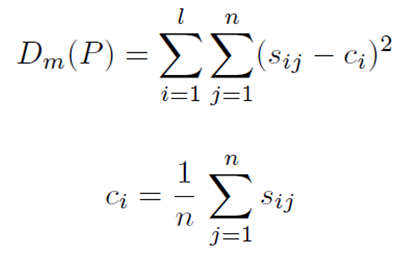

In [ ]:
def ObtenerDiversidadMomentoDeInercia(Poblacion):
  Diversidad = 0
  N = Poblacion.shape[0]
  D = Poblacion.shape[1]
  promedio = np.mean(Poblacion, axis=0)
  print(promedio[D-1])
  MatrizDiversidad = np.power((Poblacion - promedio),2)

  Diversidad = np.sum(MatrizDiversidad)

  return Diversidad

inicio = time.time()
Diversidad_MomentoDeInercia = ObtenerDiversidadMomentoDeInercia(Poblacion)
fin = time.time()
print(f'Diversidad de Momento de Inercia: {Diversidad_MomentoDeInercia}')
print(f'Tiempo Diversidad de Momento de Inercia: {fin-inicio}')


0.54
Diversidad de Momento de Inercia: 122491.86000000002
Tiempo Diversidad de Momento de Inercia: 0.015539169311523438


###4) Diversidad de Hamming por pareja

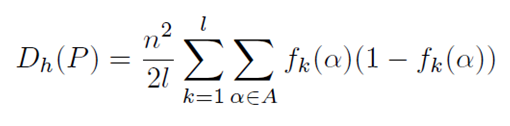


In [ ]:
def ObtenerDiversidadHammingPorParejaPorFrecuencias(Poblacion):
  Diversidad = 0
  frecuencias0 = []
  frecuencias1 = []
  
  for d in range(len(Poblacion[0])):
    frecuencia0 = 0
    frecuencia1 = 0
    
    for p in range(len(Poblacion)):
      if Poblacion[p][d] == 0:
        frecuencia0 = frecuencia0 + 1
      else:
        frecuencia1 = frecuencia1 + 1
    
    frecuencias0.append(frecuencia0)
    frecuencias1.append(frecuencia1)

  sumatoria = 0
  for d in range(len(Poblacion[0])):
    n = len(Poblacion)
    #print(f'frecuencias0[d]/n: {frecuencias0[d]/n}')
    #print(f'frecuencias1[d]/n: {frecuencias1[d]/n}')
    sumatoria = sumatoria + (frecuencias0[d]/n) * (1 - (frecuencias0[d]/n))
    sumatoria = sumatoria + (frecuencias1[d]/n) * (1 - (frecuencias1[d]/n))

  Diversidad = ((len(Poblacion)**2) / (2 * len(Poblacion[0]))) * sumatoria

  return Diversidad

def ObtenerDiversidadHammingPorPareja(Poblacion):
  Diversidad = 0
  Distancias = []
    
  for i in range(len(Poblacion) - 1):
    for k in range(len(Poblacion)):
      Distancia = 0

      if i < k:        
        Distancia = distance.hamming(Poblacion[i],Poblacion[k])
        #print(f'Distancia: {Distancia}')
        Distancias.append(Distancia)

  for i in range(len(Distancias)):
    Diversidad = Diversidad + Distancias[i] 
    
  return Diversidad

#print(f'Poblacion: {Poblacion}')

inicio = time.time()
Diversidad_HammingPorParejaPorFrecuencia = ObtenerDiversidadHammingPorParejaPorFrecuencias(Poblacion)
fin = time.time()
print(f'Diversidad de Hamming por Pareja por frecuencia: {Diversidad_HammingPorParejaPorFrecuencia}')
print(f'Tiempo Diversidad de Hamming por Pareja por frecuencia: {fin-inicio}')

inicio = time.time()
Diversidad_HammingPorPareja = ObtenerDiversidadHammingPorPareja(Poblacion)
fin = time.time()
print(f'Diversidad de Hamming por Pareja: {Diversidad_HammingPorPareja}')
print(f'Tiempo Diversidad de Hamming por Pareja: {fin-inicio}')


Diversidad de Hamming por Pareja por frecuencia: 612.4592999999936
Tiempo Diversidad de Hamming por Pareja por frecuencia: 0.27701401710510254
Diversidad de Hamming por Pareja: 612.4593000000013
Tiempo Diversidad de Hamming por Pareja: 0.11799240112304688


###5) Diversidad Entrópica

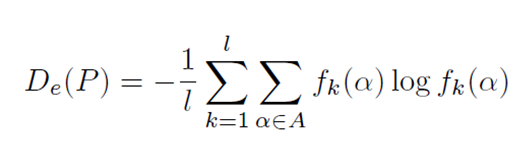

In [ ]:
def ObtenerDiversidadEntropica(Poblacion):
  Diversidad = 0
  frecuencias0 = []
  frecuencias1 = []
  
  for d in range(len(Poblacion[0])):
    frecuencia0 = 0
    frecuencia1 = 0
    
    for p in range(len(Poblacion)):
      if Poblacion[p][d] == 0:
        frecuencia0 = frecuencia0 + 1
      else:
        frecuencia1 = frecuencia1 + 1
    
    frecuencias0.append(frecuencia0)
    frecuencias1.append(frecuencia1)

  sumatoria = 0
  for d in range(len(Poblacion[0])):
    n = len(Poblacion)
    if frecuencias0[d] != 0 and frecuencias1[d] != 0:
      sumatoria = sumatoria + (frecuencias0[d]/n) * (math.log(frecuencias0[d]/n))
      sumatoria = sumatoria + (frecuencias1[d]/n) * (math.log(frecuencias1[d]/n))

  Diversidad = (-1 / (len(Poblacion[0]))) * sumatoria

  return Diversidad


Diversidad_Entropica = ObtenerDiversidadEntropica(Poblacion)
print(f'Diversidad de Entrópica: {Diversidad_Entropica}')

Diversidad de Entrópica: 0.6830103987656949


###6) Diversidad Leung-Gao-Xu

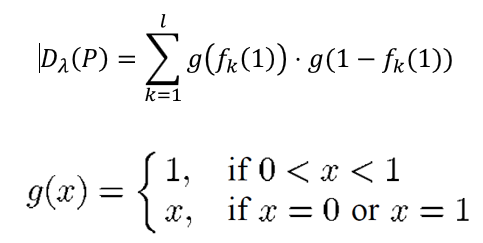

In [ ]:
def g(frecuencia):

  if frecuencia == 0 or frecuencia == 1:
    g = frecuencia
  else:
    g = 1

  return g

def ObtenerDiversidadLeungGaoXu(Poblacion):
  Diversidad = 0
  frecuencias0 = []
  frecuencias1 = []
  n = len(Poblacion)
  for d in range(len(Poblacion[0])):
    frecuencia0 = 0
    frecuencia1 = 0
    
    for p in range(len(Poblacion)):
      if Poblacion[p][d] == 0:
        frecuencia0 = frecuencia0 + 1
      else:
        frecuencia1 = frecuencia1 + 1
    
    frecuencias0.append(frecuencia0/n)
    frecuencias1.append(frecuencia1/n)

  sumatoria = 0
  for d in range(len(Poblacion[0])):
    
    sumatoria = sumatoria + g(frecuencias0[d]) * g(1- frecuencias0[d])

  Diversidad =  sumatoria

  return Diversidad



Diversidad_LeungGaoXu = ObtenerDiversidadLeungGaoXu(Poblacion)
print(f'Diversidad de Leung-Gao-Xu: {Diversidad_LeungGaoXu}')

Diversidad de Leung-Gao-Xu: 10000


# Diversidad Paper 3

Morales-Castañeda, B., Zaldivar, D., Cuevas, E., Fausto, F., & Rodríguez, A. (2020). **A better balance in metaheuristic algorithms: Does it exist?.** Swarm and Evolutionary Computation, 100671.

> PDF: http://zeus.inf.ucv.cl/~bcrawford/AULA_MII_748/2020_2/3_2020_2_A%20better%20balance%20in%20metaheuristic%20algorithms_Does%20it%20exist.pdf



### 7) Diversidad Dimensional

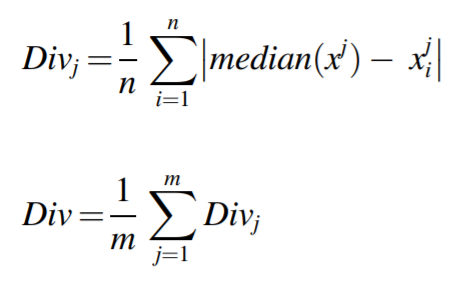


In [ ]:
#Falta que Felipe lo revise
TamPob = 50
TamDim = 10000

Poblacion = GenerarPoblacionInicial(TamPob,TamDim)

def ObtenerDiversidadDimensional2(Poblacion):
  Diversidad = 0
  for p in range(len(Poblacion)):
    Divj = 0
    Promedio = statistics.median(Poblacion[p])
    for d in range(len(Poblacion[p])):
      Divj = Divj +  abs(Promedio- Poblacion[p][d])
      
    Divj = Divj / len(Poblacion[p])

    Diversidad = Diversidad + Divj
    
  Diversidad = Diversidad / len(Poblacion)    

  return Diversidad

def ObtenerDiversidadDimensional(Poblacion):
  Diversidad = 0
  MatrizDiversidad = np.zeros((len(Poblacion)))
  Pob = np.array(Poblacion)
  Promedio = np.median(Poblacion, axis=1)
  #print(f'Poblacion: {Poblacion}')

  for d in range(len(Poblacion[0])):
    Divj = 0
    MatrizDiversidad = abs(Promedio  - Pob[:,d])
    Diversidad = Diversidad + MatrizDiversidad.sum()/len(Poblacion[0])
        
  Diversidad = Diversidad / len(Poblacion)

  return Diversidad

print(f'Tamaño Poblacio: {TamPob}')
print(f'Tamaño Dimensiones: {TamDim}')
inicio = time.time()
Diversidad_Dimensional = ObtenerDiversidadDimensional(Poblacion)
fin = time.time()
print(f'Diversidad Dimensional 1 For: {Diversidad_Dimensional}')
print(f'tiempo = {fin - inicio}')

inicio = time.time()
Diversidad_Dimensional = ObtenerDiversidadDimensional2(Poblacion)
fin = time.time()
print(f'Diversidad Dimensional 2 For: {Diversidad_Dimensional}')
print(f'tiempo = {fin - inicio}')


Tamaño Poblacio: 50
Tamaño Dimensiones: 10000
Diversidad Dimensional 1 For: 0.4959980000000291
tiempo = 0.08251714706420898
Diversidad Dimensional 2 For: 0.4959980000000002
tiempo = 0.4572017192840576


#Diversidad Paper 5

Lynn, N., & Suganthan, P. N. (2015). Heterogeneous comprehensive learning particle swarm optimization with enhanced exploration and exploitation. Swarm and Evolutionary Computation, 24, 11-24.

> PDF: http://zeus.inf.ucv.cl/~bcrawford/AULA_MII_748/2020_2/5_2020_2_Heterogeneous%20comprehensive%20learning%20particle%20swarm%20optimization_1-s2.0-S2210650215000401-main.pdf



###8) Diversidad Pesos de Inercia? Revisar Ref 29 y 30 del paper


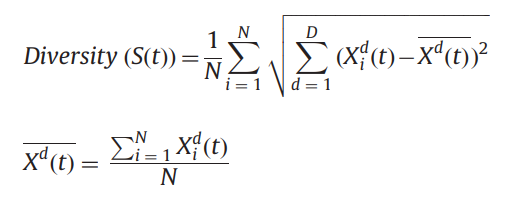


In [ ]:
def ObtenerDiversidadPesosDeInercia(Poblacion):
  Pob = Poblacion
  N = Pob.shape[0]
  D = Pob.shape[1]
  promedio = np.mean(Poblacion, axis=0)
  
  MatrizDiversidad = np.divide((np.sqrt(np.sum((np.power((Pob - promedio),2)), axis=1))),N)
  Diversidad = np.sum(MatrizDiversidad)

  return Diversidad

Diversidad_PesosDeInercia = ObtenerDiversidadPesosDeInercia(Poblacion)
print(f'Diversidad de Peso de Inercia: {Diversidad_PesosDeInercia}')


Diversidad de Peso de Inercia: 15.656485759410456


#Diversidad Paper 7

Hussain, K., Zhu, W., & Salleh, M. N. M. (2019). Long-term memory Harris’ hawk optimization for high dimensional and optimal power flow problems. IEEE Access, 7, 147596-147616.



> PDF: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8864968



### 18) Diversidad Dimensional-Hussain

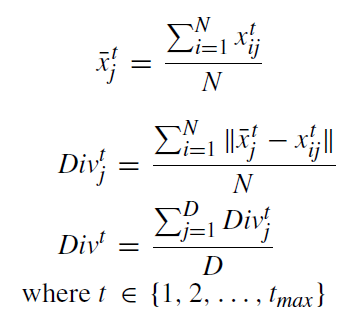

In [ ]:
def ObtenerDiversidadDimensionalHussain(Poblacion):
  Pob = np.array(Poblacion)
  N = Pob.shape[0]
  D = Pob.shape[1]
  Medias = np.mean(Poblacion, axis=0)
  
  MatrizDiversidad = np.divide(np.divide(np.abs(Medias - Pob),N),D)
    
  Diversidad = np.sum(MatrizDiversidad)

  return Diversidad


inicio = time.time()
Diversidad_Dimensional_Hussain = ObtenerDiversidadDimensionalHussain(Poblacion)
fin = time.time()
print(f'Diversidad Dimensional Hussain: {Diversidad_Dimensional_Hussain}')
print(f'tiempo = {fin - inicio}')


Diversidad Dimensional Hussain: 0.4898653599999998
tiempo = 0.008096933364868164


#Otras diversidades

https://docs.scipy.org/doc/scipy/reference/spatial.distance.html


### Diversidad de Dice
Distancia "Dice":

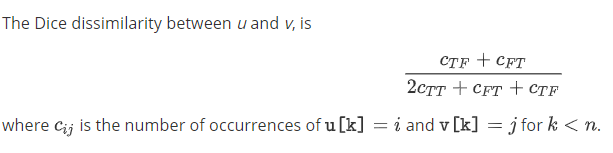

In [ ]:
def ObtenerDiversidadDice(Poblacion):
  Distancias = []
  Diversidad = 0

  for j in range(len(Poblacion) -1):
    for k in range(len(Poblacion)):
      if k <= j:
        continue
      else:
        X = Poblacion[j]
        Y = Poblacion[k]

      Distancias.append(distance.dice(X,Y))

  for i in range(len(Distancias)):
    Diversidad = Diversidad + Distancias[i]

    Diversidad = Diversidad
    
  return Diversidad

Diversidad_Dice = ObtenerDiversidadDice(Poblacion)
print(f'Diversidad de Dice: {Diversidad_Dice}')

Diversidad de Dice: 611.0917888255653


###Diversidad de Jaccard

Distancia Jaccard:

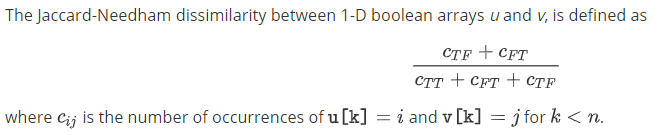
---



In [ ]:
def ObtenerDiversidadJaccard(Poblacion):
  Distancias = []
  Diversidad = 0

  for j in range(len(Poblacion) -1):
    for k in range(len(Poblacion)):
      if k <= j:
        continue
      else:
        X = Poblacion[j]
        Y = Poblacion[k]

      Distancias.append(distance.jaccard(X,Y))
      #Revisar diferencias
      #Distancias.append(jaccard_score(X,Y,average='binary'))
      #Distancias.append(jaccard_score(X,Y,average='micro'))
      #Distancias.append(jaccard_score(X,Y,average='macro'))
      #Distancias.append(jaccard_score(X,Y,average='weighted'))

  for i in range(len(Distancias)):
    Diversidad = Diversidad + Distancias[i]

    Diversidad = Diversidad
    
  return Diversidad

Diversidad_Jaccard = ObtenerDiversidadJaccard(Poblacion)
print(f'Diversidad de Jaccard: {Diversidad_Jaccard}')

Diversidad de Jaccard: 815.3848452269876


### Diversidad de Kulsinski

Distancia Kulsinski:

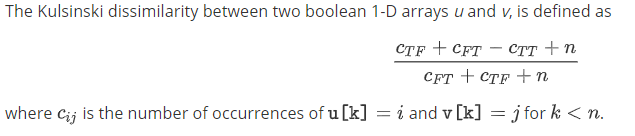

In [ ]:
def ObtenerDiversidadKulsinski(Poblacion):
  Distancias = []
  Diversidad = 0

  for j in range(len(Poblacion) -1):
    for k in range(len(Poblacion)):
      if k <= j:
        continue
      else:
        X = Poblacion[j]
        Y = Poblacion[k]

      Distancias.append(distance.kulsinski(X,Y))

  for i in range(len(Distancias)):
    Diversidad = Diversidad + Distancias[i]

    Diversidad = Diversidad
    
  return Diversidad

Diversidad_Kulsinski = ObtenerDiversidadKulsinski(Poblacion)
print(f'Diversidad de Kulsinski: {Diversidad_Kulsinski}')

Diversidad de Kulsinski: 1019.8166805560189


###Diversidad de Rogers-Tanimoto

Distancia Rogers-Tanimoto:

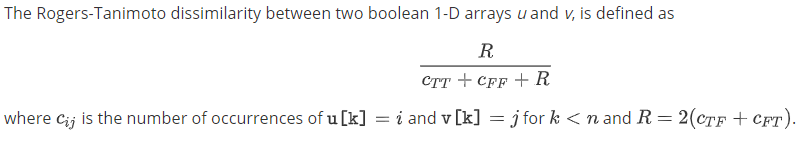

In [ ]:
def ObtenerDiversidadRogerstanimoto(Poblacion):
  Distancias = []
  Diversidad = 0

  for j in range(len(Poblacion) -1):
    for k in range(len(Poblacion)):
      if k <= j:
        continue
      else:
        X = Poblacion[j]
        Y = Poblacion[k]

      Distancias.append(distance.rogerstanimoto(X,Y))
      #Revisar diferencias
      #Distancias.append(jaccard_score(X,Y,average='binary'))
      #Distancias.append(jaccard_score(X,Y,average='micro'))
      #Distancias.append(jaccard_score(X,Y,average='macro'))
      #Distancias.append(jaccard_score(X,Y,average='weighted'))

  for i in range(len(Distancias)):
    Diversidad = Diversidad + Distancias[i]

    Diversidad = Diversidad
    
  return Diversidad

Diversidad_Rogerstanimoto = ObtenerDiversidadRogerstanimoto(Poblacion)
print(f'Diversidad de Rogerstanimoto: {Diversidad_Rogerstanimoto}')

Diversidad de Rogerstanimoto: 816.8156734319832


###Diversidad de Russellrao

Distancia Russellrao:

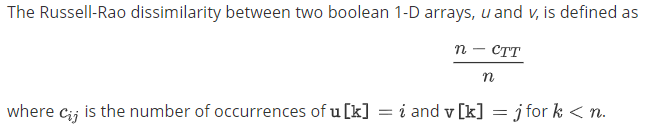

In [ ]:
def ObtenerDiversidadRussellrao(Poblacion):
  Distancias = []
  Diversidad = 0

  for j in range(len(Poblacion) -1):
    for k in range(len(Poblacion)):
      if k <= j:
        continue
      else:
        X = Poblacion[j]
        Y = Poblacion[k]

      Distancias.append(distance.russellrao(X,Y))

  for i in range(len(Distancias)):
    Diversidad = Diversidad + Distancias[i]

    Diversidad = Diversidad
    
  return Diversidad

Diversidad_Russellrao = ObtenerDiversidadRussellrao(Poblacion)
print(f'Diversidad de Russellrao: {Diversidad_Russellrao}')

Diversidad de Russellrao: 917.2073999999996


###Diversidad de Sokal-Michener

Distancia Sokal-Michener:

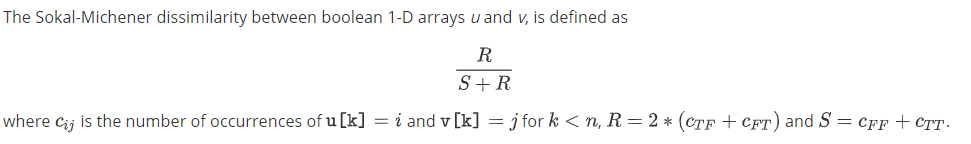

In [ ]:
def ObtenerDiversidadSokalmichener(Poblacion):
  Distancias = []
  Diversidad = 0

  for j in range(len(Poblacion) -1):
    for k in range(len(Poblacion)):
      if k <= j:
        continue
      else:
        X = Poblacion[j]
        Y = Poblacion[k]

      Distancias.append(distance.sokalmichener(X,Y))


  for i in range(len(Distancias)):
    Diversidad = Diversidad + Distancias[i]

    Diversidad = Diversidad
    
  return Diversidad

Diversidad_Sokalmichener = ObtenerDiversidadSokalmichener(Poblacion)
print(f'Diversidad de Sokalmichener: {Diversidad_Sokalmichener}')

Diversidad de Sokalmichener: 816.8156734319832


###Diversidad de Yule

Distancia Yule:

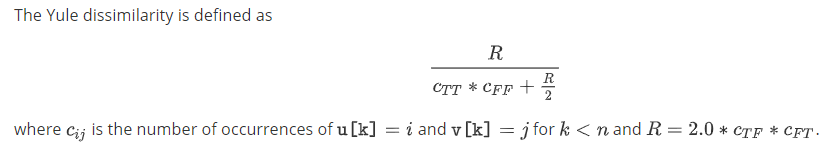

In [ ]:
def ObtenerDiversidadYule(Poblacion):
  #print(Poblacion)
  Distancias = []
  Diversidad = 0

  for j in range(len(Poblacion) -1):
    for k in range(len(Poblacion)):
      if k <= j:
        continue
      else:
        X = Poblacion[j]
        Y = Poblacion[k]

      Distancias.append(distance.yule(X,Y))
      
  MatrizDeNan = np.isnan(Distancias)
  #print(f'MatrizDeNan: {MatrizDeNan}')
  for i in range(len(Distancias)):
    if MatrizDeNan[i] == False:
      Diversidad = Diversidad + Distancias[i]

    Diversidad = Diversidad
    
  return Diversidad

def _validate_vector(u, dtype=None):
    # XXX Is order='c' really necessary?
    u = np.asarray(u, dtype=dtype, order='c').squeeze()
    # Ensure values such as u=1 and u=[1] still return 1-D arrays.
    u = np.atleast_1d(u)
    if u.ndim > 1:
        raise ValueError("Input vector should be 1-D.")
    return u

def YaleDistance(u, v):
  u = _validate_vector(u)
  v = _validate_vector(v)
  #print(f'u: {u}')
  #print(f'v: {v}')
  not_u = ~u
  not_v = ~v
  nff = (not_u & not_v).sum()
  nft = (not_u & v).sum()
  ntf = (u & not_v).sum()
  ntt = (u & v).sum()

  #print(f'nff: {nff}')
  #print(f'nft: {nft}')
  #print(f'ntf: {ntf}')
  #print(f'ntt: {ntt}')
  #print(2.0 * ntf * nft)
  #print(ntt * nff + ntf * nft)
  #print(ntt * nff)
  #print(ntf * nft)

  return float(2.0 * ntf * nft / np.array(ntt * nff + ntf * nft))

Diversidad_Yule = ObtenerDiversidadYule(Poblacion)
print(f'Diversidad de Yule: {Diversidad_Yule}')

Diversidad de Yule: 1225.7637238612072


###Diversidad de Sokal-Sneath

Distancia Sokal-Sneath:

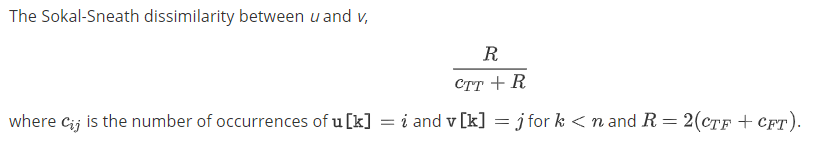

In [ ]:
def ObtenerDiversidadSokalsneath(Poblacion):
  Distancias = []
  Diversidad = 0

  for j in range(len(Poblacion) -1):
    for k in range(len(Poblacion)):
      if k <= j:
        continue
      else:
        X = Poblacion[j]
        Y = Poblacion[k]

      Distancias.append(distance.sokalsneath(X,Y))

  for i in range(len(Distancias)):
    Diversidad = Diversidad + Distancias[i]

    Diversidad = Diversidad
    
  return Diversidad

Diversidad_Sokalsneath = ObtenerDiversidadSokalsneath(Poblacion)
print(f'Diversidad de Sokalsneath: {Diversidad_Sokalsneath}')

Diversidad de Sokalsneath: 979.05968765434


#Resumen de Distancias

### Resultados de Diversidades

In [ ]:
TamPob = 3
TamDim = 20
Poblacion = GenerarPoblacionInicial(TamPob,TamDim)
print(f'Poblacion: {Poblacion}')


print(colored("Diversidades Paper 4", 'green', attrs=['bold']))

Diversidad_SubCadenas = ObtenerDiversidadSubCadenas(Poblacion)
print(f'1) Diversidad de SubCadenas: {Diversidad_SubCadenas}')

Diversidad_Tanimoto_SubCadenas = ObtenerDiversidadTanimotoSubCadenas(Poblacion)
print(f'2) Diversidad de Tanimoto SubCadenas: {Diversidad_Tanimoto_SubCadenas}')

Diversidad_MomentoDeIntercia = ObtenerDiversidadMomentoDeInercia(Poblacion)
print(f'3) Diversidad de Momento de Inercia: {Diversidad_MomentoDeIntercia}')

Diversidad_HammingPorPareja = ObtenerDiversidadHammingPorPareja(Poblacion)
print(f'4) Diversidad de Hamming por Pareja: {Diversidad_HammingPorPareja}')

Diversidad_HammingPorParejaPorFrecuencia = ObtenerDiversidadHammingPorParejaPorFrecuencias(Poblacion)
print(f'4) Diversidad de Hamming por Pareja por frecuencia: {Diversidad_HammingPorParejaPorFrecuencia}')

Diversidad_Entropica = ObtenerDiversidadEntropica(Poblacion)
print(f'5) Diversidad de Entrópica: {Diversidad_Entropica}')

Diversidad_LeungGaoXu = ObtenerDiversidadLeungGaoXu(Poblacion)
print(f'6) Diversidad de Leung-Gao-Xu: {Diversidad_LeungGaoXu}')




print("\n")
print(colored("Diversidad Paper 3", 'green', attrs=['bold']))

Diversidad_Dimensional = ObtenerDiversidadDimensional(Poblacion)
print(f'7) Diversidad Dimensional: {Diversidad_Dimensional}')




print("\n")
print(colored("Diversidad Paper 5", 'green', attrs=['bold']))

Diversidad_PesosDeIntercia = ObtenerDiversidadPesosDeInercia(Poblacion)
print(f'9) Diversidad de Peso de Inercia?: {Diversidad_PesosDeIntercia}')




print("\n")
print(colored("Otras Diversidades", 'green', attrs=['bold']))

Diversidad_Dice = ObtenerDiversidadDice(Poblacion)
print(f'10) Diversidad de Dice: {Diversidad_Dice}')

Diversidad_Jaccard = ObtenerDiversidadJaccard(Poblacion)
print(f'11) Diversidad de Jaccard: {Diversidad_Jaccard}')

Diversidad_Kulsinski = ObtenerDiversidadKulsinski(Poblacion)
print(f'12) Diversidad de Kulsinski: {Diversidad_Kulsinski}')

Diversidad_Rogerstanimoto = ObtenerDiversidadRogerstanimoto(Poblacion)
print(f'13) Diversidad de Rogerstanimoto: {Diversidad_Rogerstanimoto}')

Diversidad_Russellrao = ObtenerDiversidadRussellrao(Poblacion)
print(f'14) Diversidad de Russellrao: {Diversidad_Russellrao}')

Diversidad_Sokalmichener = ObtenerDiversidadSokalmichener(Poblacion)
print(f'15) Diversidad de Sokalmichener: {Diversidad_Sokalmichener}')

Diversidad_Sokalsneath = ObtenerDiversidadSokalsneath(Poblacion)
print(f'16) Diversidad de Sokalsneath: {Diversidad_Sokalsneath}')

Diversidad_Yule = ObtenerDiversidadYule(Poblacion)
print(f'17) Diversidad de Yule: {Diversidad_Yule}')


print("\n")
print(colored("Diversidad Paper 7", 'green', attrs=['bold']))

Diversidad_Dimensional_Hussain = ObtenerDiversidadDimensionalHussain(Poblacion)
print(f'18) Diversidad Dimensional Hussain 1 For: {Diversidad_Dimensional_Hussain}')


Poblacion: [[0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1]
 [1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0]
 [0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1]]
Diversidades Paper 4
1) Diversidad de SubCadenas: 2.669724770642202
2) Diversidad de Tanimoto SubCadenas: 2.765854301116522
0.6666666666666666
3) Diversidad de Momento de Inercia: 12.0
4) Diversidad de Hamming por Pareja: 1.8
4) Diversidad de Hamming por Pareja por frecuencia: 1.8000000000000005
5) Diversidad de Entrópica: 0.5728627514653315
6) Diversidad de Leung-Gao-Xu: 18.0


Diversidad Paper 3
7) Diversidad Dimensional: 0.3333333333333334


Diversidad Paper 5
9) Diversidad de Peso de Inercia?: 1.9835757129404585


Otras Diversidades
10) Diversidad de Dice: 1.6876006441223832
11) Diversidad de Jaccard: 2.0826238390092877
12) Diversidad de Kulsinski: 2.4727783957483624
13) Diversidad de Rogerstanimoto: 2.2192559634161415
14) Diversidad de Russellrao: 2.2
15) Diversidad de Sokalmichener: 2.2192559634161415
16) Diversidad de Sokalsneath: 2.4230303

### Resultados en tiempo

0.5
ResultadosPromedio: [12252.779999999999, 612.6390000000006, 612.6389999999942, 0.6831607224420996, 1000.0, 0.48825999999999786, 1.9835757129404585, 613.1203878539706, 816.9380064892483, 1020.9130473739505, 816.6097883806788, 918.9910000000006, 816.6097883806788, 980.0337263284899, 1225.5072624181184]
15
TiempoPromedio: [0.0017917156219482422, 0.026846647262573242, 0.026535987854003906, 0.026708126068115234, 0.026458263397216797, 0.006796598434448242, 0.0009219646453857422, 0.07510685920715332, 0.02729320526123047, 0.061161041259765625, 0.06522798538208008, 0.01770639419555664, 0.0755620002746582, 0.06753063201904297, 0.07607579231262207]
15
Cantidad de Diversidades calculadas: 15
Tiempo total de calcular 15 Diversidades: 0.7126119136810303
Tamaño de Población: 50
Tamaño de Dimensiones: 1000


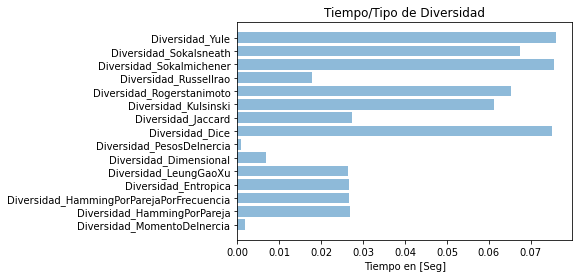

In [ ]:
Corridas = 1
TamPob = 50
TamDim = 1000

TotalInicio = time.time()

for i in range(Corridas):
  Tiempo = []
  Resultado = []
  Poblacion = GenerarPoblacionInicial(TamPob,TamDim)

  #Inicio = time.time()
  #Diversidad_SubCadenas = ObtenerDiversidadSubCadenas(Poblacion)
  #Fin = time.time()
  #Time_Diversidad_SubCadenas = Fin-Inicio
  #Resultado.append(Diversidad_SubCadenas)
  #Tiempo.append(Time_Diversidad_SubCadenas)

  #Inicio = time.time()
  #Diversidad_Tanimoto_SubCadenas = ObtenerDiversidadTanimotoSubCadenas(Poblacion)
  #Fin = time.time()
  #Time_Diversidad_Tanimoto_SubCadenas = Fin-Inicio
  #Resultado.append(Diversidad_Tanimoto_SubCadenas)
  #Tiempo.append(Time_Diversidad_Tanimoto_SubCadenas)

  Inicio = time.time()
  Diversidad_MomentoDeIntercia = ObtenerDiversidadMomentoDeInercia(Poblacion)
  Fin = time.time()
  Time_Diversidad_MomentoDeIntercia = Fin-Inicio
  Resultado.append(Diversidad_MomentoDeIntercia)
  Tiempo.append(Time_Diversidad_MomentoDeIntercia)

  Inicio = time.time()
  Diversidad_HammingPorPareja = ObtenerDiversidadHammingPorPareja(Poblacion)
  Fin = time.time()
  Time_Diversidad_HammingPorPareja = Fin-Inicio
  Resultado.append(Diversidad_HammingPorPareja)
  Tiempo.append(Time_Diversidad_HammingPorPareja)

  Inicio = time.time()
  Diversidad_HammingPorParejaPorFrecuencia = ObtenerDiversidadHammingPorParejaPorFrecuencias(Poblacion)
  Fin = time.time()
  Time_Diversidad_HammingPorParejaPorFrecuencia = Fin-Inicio
  Resultado.append(Diversidad_HammingPorParejaPorFrecuencia)
  Tiempo.append(Time_Diversidad_HammingPorParejaPorFrecuencia)

  Inicio = time.time()
  Diversidad_Entropica = ObtenerDiversidadEntropica(Poblacion)
  Fin = time.time()
  Time_Diversidad_Entropica = Fin-Inicio
  Resultado.append(Diversidad_Entropica)
  Tiempo.append(Time_Diversidad_Entropica)

  Inicio = time.time()
  Diversidad_LeungGaoXu = ObtenerDiversidadLeungGaoXu(Poblacion)
  Fin = time.time()
  Time_Diversidad_LeungGaoXu = Fin-Inicio
  Resultado.append(Diversidad_LeungGaoXu)
  Tiempo.append(Time_Diversidad_LeungGaoXu)

  Inicio = time.time()
  Diversidad_Dimensional = ObtenerDiversidadDimensional(Poblacion)
  Fin = time.time()
  Time_Diversidad_Dimensional = Fin-Inicio
  Resultado.append(Diversidad_Dimensional)
  Tiempo.append(Time_Diversidad_Dimensional)

  Inicio = time.time()
  Diversidad_PesosDeInercia  = ObtenerDiversidadPesosDeInercia(Poblacion)
  Fin = time.time()
  Time_Diversidad_PesosDeInercia = Fin-Inicio
  Resultado.append(Diversidad_PesosDeIntercia)
  Tiempo.append(Time_Diversidad_PesosDeInercia)

  Inicio = time.time()
  Diversidad_Dice = ObtenerDiversidadDice(Poblacion)
  Fin = time.time()
  Time_Diversidad_Dice = Fin-Inicio
  Resultado.append(Diversidad_Dice)
  Tiempo.append(Time_Diversidad_Dice)

  Inicio = time.time()
  Diversidad_Jaccard = ObtenerDiversidadJaccard(Poblacion)
  Fin = time.time()
  Time_Diversidad_Jaccard = Fin-Inicio
  Resultado.append(Diversidad_Jaccard)
  Tiempo.append(Time_Diversidad_Jaccard)

  Inicio = time.time()
  Diversidad_Kulsinski = ObtenerDiversidadKulsinski(Poblacion)
  Fin = time.time()
  Time_Diversidad_Kulsinski = Fin-Inicio
  Resultado.append(Diversidad_Kulsinski)
  Tiempo.append(Time_Diversidad_Kulsinski)

  Inicio = time.time()
  Diversidad_Rogerstanimoto = ObtenerDiversidadRogerstanimoto(Poblacion)
  Fin = time.time()
  Time_Diversidad_Rogerstanimoto = Fin-Inicio
  Resultado.append(Diversidad_Rogerstanimoto)
  Tiempo.append(Time_Diversidad_Rogerstanimoto)

  Inicio = time.time()
  Diversidad_Russellrao = ObtenerDiversidadRussellrao(Poblacion)
  Fin = time.time()
  Time_Diversidad_Russellrao = Fin-Inicio
  Resultado.append(Diversidad_Russellrao)
  Tiempo.append(Time_Diversidad_Russellrao)

  Inicio = time.time()
  Diversidad_Sokalmichener = ObtenerDiversidadSokalmichener(Poblacion)
  Fin = time.time()
  Time_Diversidad_Sokalmichener = Fin-Inicio
  Resultado.append(Diversidad_Sokalmichener)
  Tiempo.append(Time_Diversidad_Sokalmichener)

  Inicio = time.time()
  Diversidad_Sokalsneath = ObtenerDiversidadSokalsneath(Poblacion)
  Fin = time.time()
  Time_Diversidad_Sokalsneath = Fin-Inicio
  Resultado.append(Diversidad_Sokalsneath)
  Tiempo.append(Time_Diversidad_Sokalsneath)

  Inicio = time.time()
  Diversidad_Yule = ObtenerDiversidadYule(Poblacion)
  Fin = time.time()
  Time_Diversidad_Yule = Fin-Inicio
  Resultado.append(Diversidad_Yule)
  Tiempo.append(Time_Diversidad_Yule)

  if i == 0:
    ResultadosPromedio = Resultado
    TiempoPromedio = Tiempo
  else:
    for j in range(len(ResultadosPromedio)):
      ResultadosPromedio[j] = ResultadosPromedio[j] + Resultado[j]
      TiempoPromedio[j] = TiempoPromedio[j] + Tiempo[j]

for j in range(len(ResultadosPromedio)):
  ResultadosPromedio[j] = ResultadosPromedio[j] / Corridas
  TiempoPromedio[j] = TiempoPromedio[j] / Corridas

print(f'ResultadosPromedio: {ResultadosPromedio}')
print(len(ResultadosPromedio))
print(f'TiempoPromedio: {TiempoPromedio}')
print(len(TiempoPromedio))

#TiposDiversidad = [1,2,3,4,5,6,7]
#fig, ax = plt.subplots()
#ax.set_ylabel('Tiempo en Seg')
#ax.set_title('Tiempo/Tipo de Diversidad')
#plt.bar(TiposDiversidad, TiempoPromedio)
#plt.savefig('Tiempo - Tipo de Diversidad.png')
#plt.show()


#TiposDiversidad = ['Diversidad_SubCadenas','Diversidad_Tanimoto_SubCadenas','Diversidad_MomentoDeIntercia','Diversidad_HammingPorPareja','Diversidad_HammingPorParejaPorFrecuencia','Diversidad_Entropica','Diversidad_LeungGaoXu']
#TiposDiversidad = ['Diversidad_SubCadenas','Diversidad_Tanimoto_SubCadenas','Diversidad_MomentoDeIntercia','Diversidad_HammingPorPareja','Diversidad_HammingPorParejaPorFrecuencia','Diversidad_Entropica','Diversidad_LeungGaoXu', 'Diversidad_Dimensional', 'Diversidad_PesosDeIntercia', 'Diversidad_Dice', 'Diversidad_Jaccard', 'Diversidad_Kulsinski', 'Diversidad_Rogerstanimoto', 'Diversidad_Russellrao', 'Diversidad_Sokalmichener', 'Diversidad_Sokalsneath','Diversidad_Yule']
TiposDiversidad = ['Diversidad_MomentoDeInercia','Diversidad_HammingPorPareja','Diversidad_HammingPorParejaPorFrecuencia','Diversidad_Entropica','Diversidad_LeungGaoXu', 'Diversidad_Dimensional', 'Diversidad_PesosDeInercia', 'Diversidad_Dice', 'Diversidad_Jaccard', 'Diversidad_Kulsinski', 'Diversidad_Rogerstanimoto', 'Diversidad_Russellrao', 'Diversidad_Sokalmichener', 'Diversidad_Sokalsneath','Diversidad_Yule']
TotalFinal = time.time()
TiempoTotal = TotalFinal - TotalInicio
print(f'Cantidad de Diversidades calculadas: {len(TiposDiversidad)}')
print(f'Tiempo total de calcular {len(TiposDiversidad)} Diversidades: {TiempoTotal}')
print(f'Tamaño de Población: {TamPob}')
print(f'Tamaño de Dimensiones: {TamDim}')

y_pos = np.arange(len(TiposDiversidad))
plt.barh(y_pos, TiempoPromedio, align='center', alpha=0.5)
plt.yticks(y_pos, TiposDiversidad)
plt.xlabel('Tiempo en [Seg]')
plt.title('Tiempo/Tipo de Diversidad')
plt.savefig('Tiempo - Tipo de Diversidad - barras_horizontal.png')
plt.show()